In [6]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('birlesik_veri.csv')
df.head()

,id,intersection_id,start_time,end_time,detector_id,camera_id,class_id,direction,total,occupancy_time,speed
0,3736612,354,2022-07-01 00:05:00,2022-07-01 00:10:00,1,1,1,0,65,317,117
1,3736613,354,2022-07-01 00:05:00,2022-07-01 00:10:00,2,1,1,0,76,392,97
2,3736614,354,2022-07-01 00:05:00,2022-07-01 00:10:00,2,1,4,0,6,350,90
3,3736615,354,2022-07-01 00:05:00,2022-07-01 00:10:00,2,1,5,0,6,339,94
4,3736616,354,2022-07-01 00:05:00,2022-07-01 00:10:00,3,1,1,0,39,396,87


HAFTANIN GÜNLERİNE GÖRE TOPLAM GEÇİŞ SAYISI

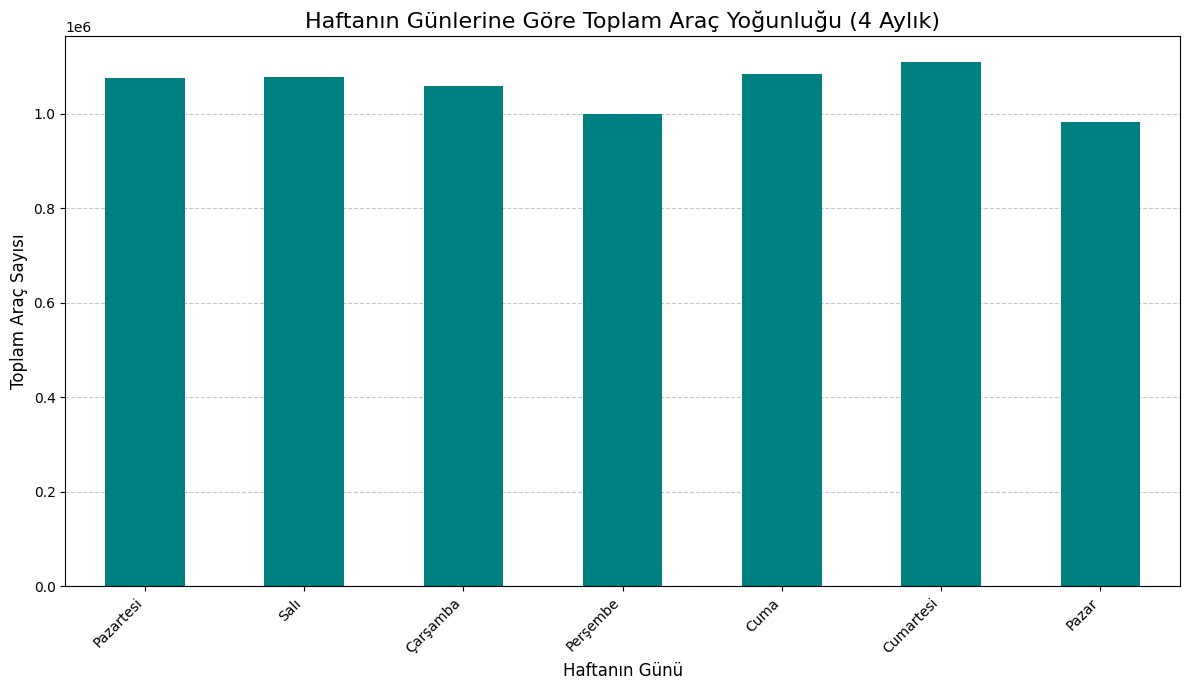

Haftanın Günlerine Göre Toplam Araç Sayıları:
gun_no
Pazartesi    1075941
Salı         1076664
Çarşamba     1057534
Perşembe      999928
Cuma         1083858
Cumartesi    1108894
Pazar         982293
Name: total, dtype: int64


In [7]:
# csv alındığından metindir tarih formatına çevrilir
df['start_time'] = pd.to_datetime(df['start_time'])
# Her bir tarihin hangi güne denk geldiğini (0=Pazartesi, 6=Pazar) bul
df['gun_no'] = df['start_time'].dt.dayofweek

# Gün numarasına göre gruplayıp toplam araç sayılarını bulalım
gunluk_toplamlar = df.groupby('gun_no')['total'].sum()

# Grafikte doğru isimlerin ve sıralamanın görünmesi için Türkçe gün adlarını tanımlayalım
gun_isimleri = ['Pazartesi', 'Salı', 'Çarşamba', 'Perşembe', 'Cuma', 'Cumartesi', 'Pazar']
# İndeksi gün numaralarından gün isimlerine çevirelim
gunluk_toplamlar.index = gunluk_toplamlar.index.map(lambda x: gun_isimleri[x]) # map ile isimler listesinde ki her bir elemana atama işlemi yapılır


# Sonuçları bir sütun grafiği ile görselleştirelim
plt.figure(figsize=(12, 7))
gunluk_toplamlar.plot(kind='bar', color='teal', zorder=2)

plt.title('Haftanın Günlerine Göre Toplam Araç Yoğunluğu (4 Aylık)', fontsize=16)
plt.xlabel('Haftanın Günü', fontsize=12)
plt.ylabel('Toplam Araç Sayısı', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("Haftanın Günlerine Göre Toplam Araç Sayıları:")
print(gunluk_toplamlar)

Tüm günler birbirine yakın seyrediyor. Bu bilgiler yolun sadece iş saatleri değil hafta sonları iş günlerinin olmadığı zamanlarda sosyal aktiveteler içinde ciddi şekilde kullanıldığını gösteriyor.

SAATLERE GÖRE TOPLAM ARAÇ

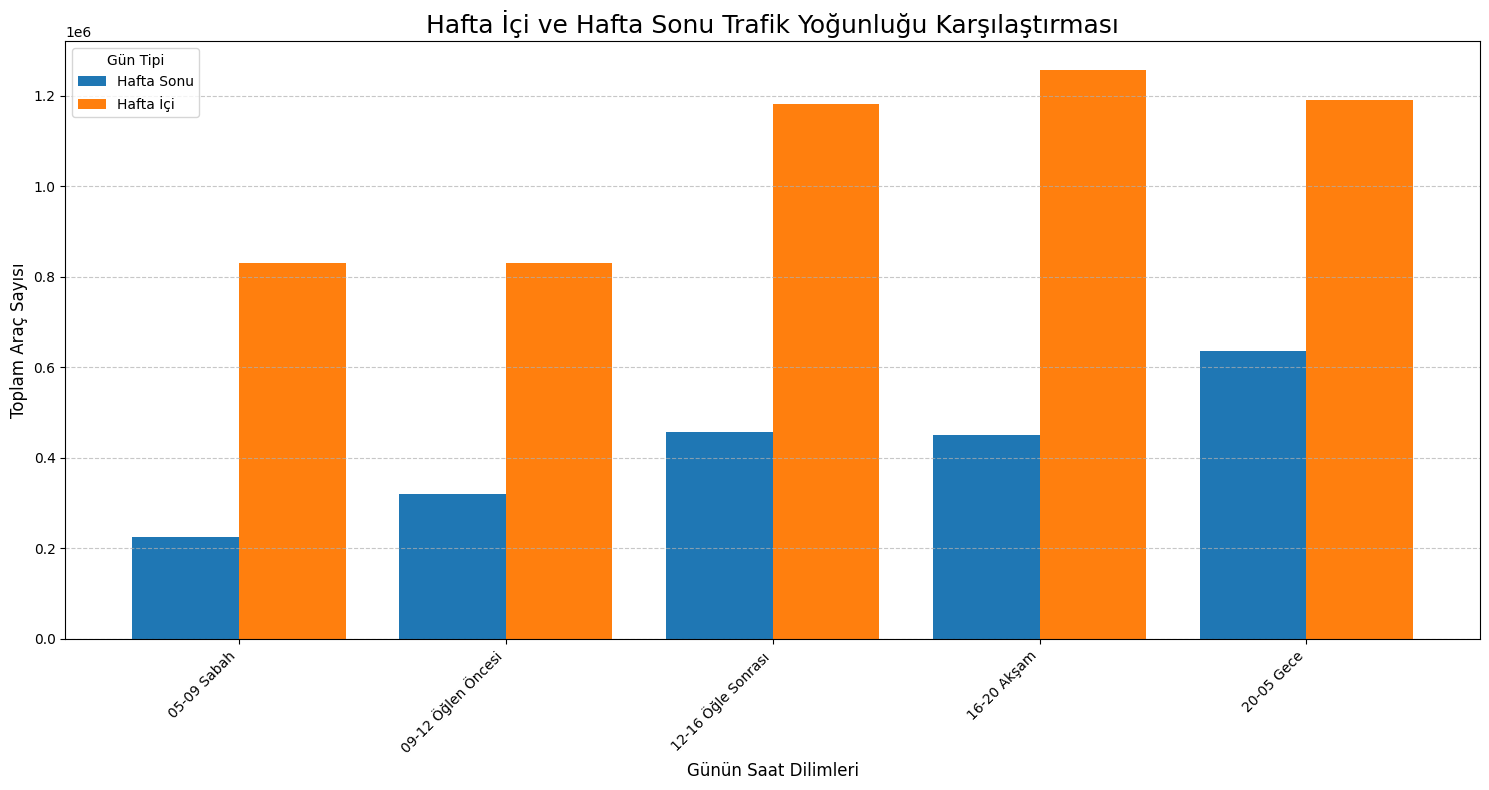

gun_tipi            Hafta Sonu  Hafta İçi
zaman_dilimi                             
05-09 Sabah             225748     831248
09-12 Öğlen Öncesi      320321     830542
12-16 Öğle Sonrası      457272    1182909
16-20 Akşam             451059    1257770
20-05 Gece              636787    1191456


In [9]:
df['start_time'] = pd.to_datetime(df['start_time'])

# Pazartesi=0, Pazar=6. 5'ten küçükse hafta içidir.
df['gun_tipi'] = df['start_time'].dt.dayofweek.apply(lambda x: 'Hafta İçi' if x < 5 else 'Hafta Sonu')

# aralıklar
def get_zaman_dilimi(saat):
    if 5 <= saat < 9:
        return '05-09 Sabah'
    elif 9 <= saat < 12:
        return '09-12 Öğlen Öncesi'
    elif 12 <= saat < 16:
        return '12-16 Öğle Sonrası'
    elif 16 <= saat < 20:
        return '16-20 Akşam'
    else: # 20:00'den sabah 05:00'e kadar olan diğer tüm saatler
        return '20-05 Gece'

# dataframe çevirdiğimiz kısımdan sadece saat kısmını alır ve get_zaman_dilimi fonksiyonuna uygular
df['zaman_dilimi'] = df['start_time'].dt.hour.apply(get_zaman_dilimi)

# unstack metodu, yan yana olan karmaşık durumu parçalar ve daha kolay görselleştirme için uygun hale getirir.
gruplanmis_veri = df.groupby(['zaman_dilimi', 'gun_tipi'])['total'].sum().unstack()

# Grafiğin x-ekseninde saat dilimlerinin doğru sırada görünmesini sağlayalım
zaman_siralamasi = [
    '05-09 Sabah',
    '09-12 Öğlen Öncesi',
    '12-16 Öğle Sonrası',
    '16-20 Akşam',
    '20-05 Gece'
]
# groupby alfabetik sıralama yaptığından dolayı zaman sırası alfabetik olacaktı. Bu okunması güç olacağından zaman sırasını belirledik ve reindex ile aramaları yaptık
gruplanmis_veri = gruplanmis_veri.reindex(zaman_siralamasi) 

# Karşılaştırmalı sütun grafiğini oluştur
gruplanmis_veri.plot(kind='bar', figsize=(15, 8), width=0.8)

plt.title('Hafta İçi ve Hafta Sonu Trafik Yoğunluğu Karşılaştırması', fontsize=18)
plt.xlabel('Günün Saat Dilimleri', fontsize=12)
plt.ylabel('Toplam Araç Sayısı', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gün Tipi')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(gruplanmis_veri)

hafta içi trafiği tamamen okul ve iş çıkış saatine göre şekilleniyor. hafta sonu ise sabah saatleri sakinken akşama doğru düzenli olarak artış oluyor bu da tamamen sosyal amaçlı. En önemli bulgu ise gece saatlerinin hafta içi de sonuda normal saatler gibi olması. Bu bulgu bize yol verilerinin istanbulun sosyal hayatının ve eğlence merkezlerinin kalbinde yer aldığını kanıtlıyor

kavşak muhtemelen istanbulun ana yollarından birine bağlı ve aynı zaman da eğlence sosyal merkezlerede yakın.
Mecidiyeköy - Zincirlikuyu Kavşağı -> çevre avmler , beşiktaş gibi 24 saat akan sokaklar aynı zamanda e-5 bağlantısı ile tüm kriterleri sağlayan en muhtemel kavşaktır.